# Detection of Monsters :

In [1]:
! pip install wefe 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.3 MB/s eta 0:00:00


### Import library

In [2]:
# for basic stuff in python
import pandas as pd
import numpy as np

# for vizualisation : 
import matplotlib.pyplot as plt
import seaborn as sns

# for scoring : 
import wefe 

# for prediction :

# against warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# for prediction :
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/test.csv.zip
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/sample_submission.csv.zip
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/train.csv.zip
/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/goblins.ipynb


In [5]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/train.csv.zip")

# Vizualisation of Dataset :

In [6]:
display(df.head())
print('')
print('') # give a bit space between head and describe
display(df.describe().T)
print('')
print('') # give a bit space between head and describe
display(df.dtypes)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


,count,mean,std,min,25%,50%,75%,max
id,371.0,443.676550,263.222489,0.000000,205.500000,458.000000,678.500000,897.000000
bone_length,371.0,0.434160,0.132833,0.061032,0.340006,0.434891,0.517223,0.817001
rotting_flesh,371.0,0.506848,0.146358,0.095687,0.414812,0.501552,0.603977,0.932466
hair_length,371.0,0.529114,0.169902,0.134600,0.407428,0.538642,0.647244,1.000000
has_soul,371.0,0.471392,0.176129,0.009402,0.348002,0.466372,0.600610,0.935721


id                 int64
bone_length      float64
rotting_flesh    float64
hair_length      float64
has_soul         float64
color             object
type              object
dtype: object

We don't really need id here because it will be like our index.

In [7]:
df = df.iloc[:,1:] # dont keep 1st column (id)

In [8]:
categorical_ft = df.select_dtypes(exclude=['float64'])
numerical_ft = df.select_dtypes(exclude=['object'])

In [9]:
def unique_raw(data: pd.DataFrame):

    print('-'*100)
    print(" "*41, '\033[1m' + "Données uniques :"+'\033[0m')  # Describe
    print('-'*100)

    dico = {}  # on crée un dictionnaire de données
    for col in data.columns:
      print('')
      print('-'*14)
      print(f"Column: {col}")
      print('-'*14)
      print('')
      print(data[col].unique())

In [10]:
unique_raw(categorical_ft)

----------------------------------------------------------------------------------------------------
                                          Données uniques :
----------------------------------------------------------------------------------------------------

--------------
Column: color
--------------

['clear' 'green' 'black' 'white' 'blue' 'blood']

--------------
Column: type
--------------

['Ghoul' 'Goblin' 'Ghost']


As we can see, we have 3 types of monsters and 6 differents colors.

Now let's see the proportion of monsters and the color between them.

### Proportion of monsters and colors :

In [11]:
pd.crosstab(df["type"],df["color"])

color,black,blood,blue,clear,green,white
type,,,,,,
Ghost,14,6,6,32,15,44
Ghoul,14,4,6,42,13,50
Goblin,13,2,7,46,14,43


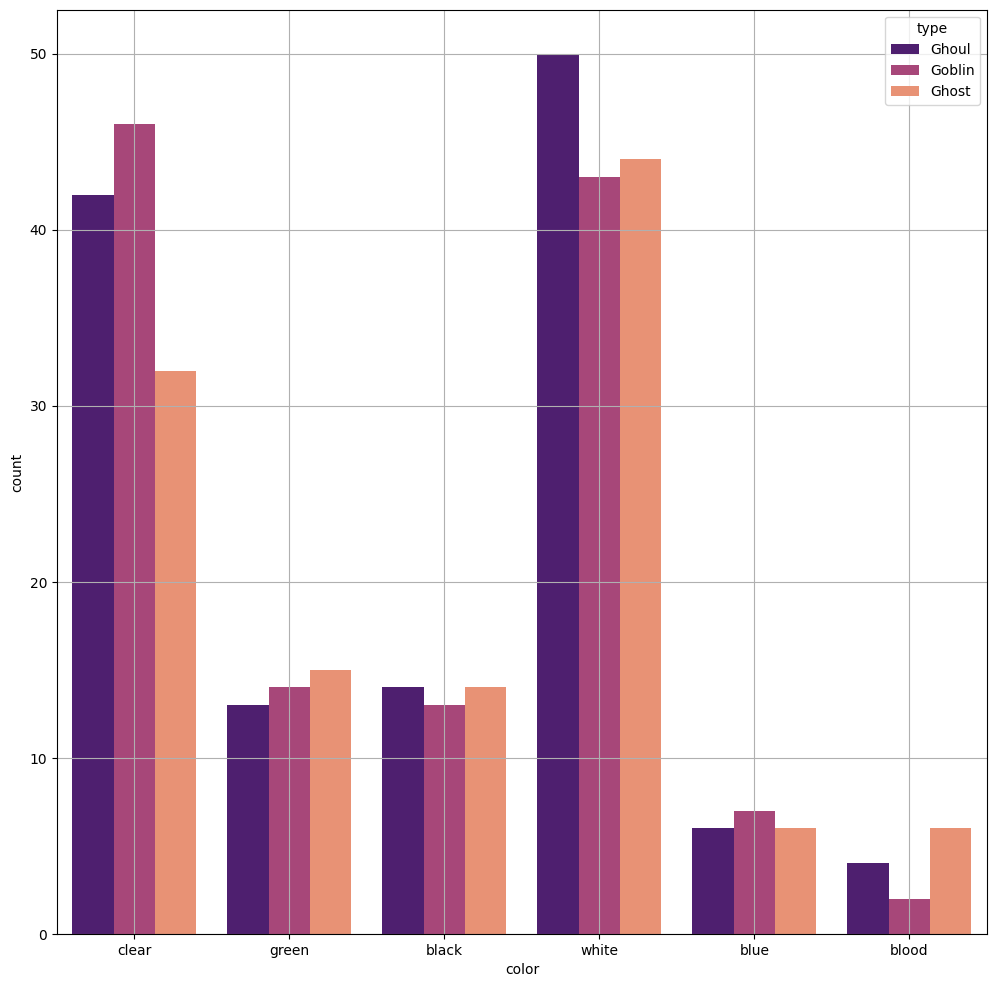

In [12]:
plt.figure(figsize=(12,12))
sns.countplot(x='color', hue='type', data=df,palette='magma')
plt.grid(True)
plt.show()

As we can see it's pretty equal.

#### Correlation : 

<ipython-input-13-b8d60e9c1a9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidth=.5, vmin=0, vmax=1, cmap="magma")


<Axes: >

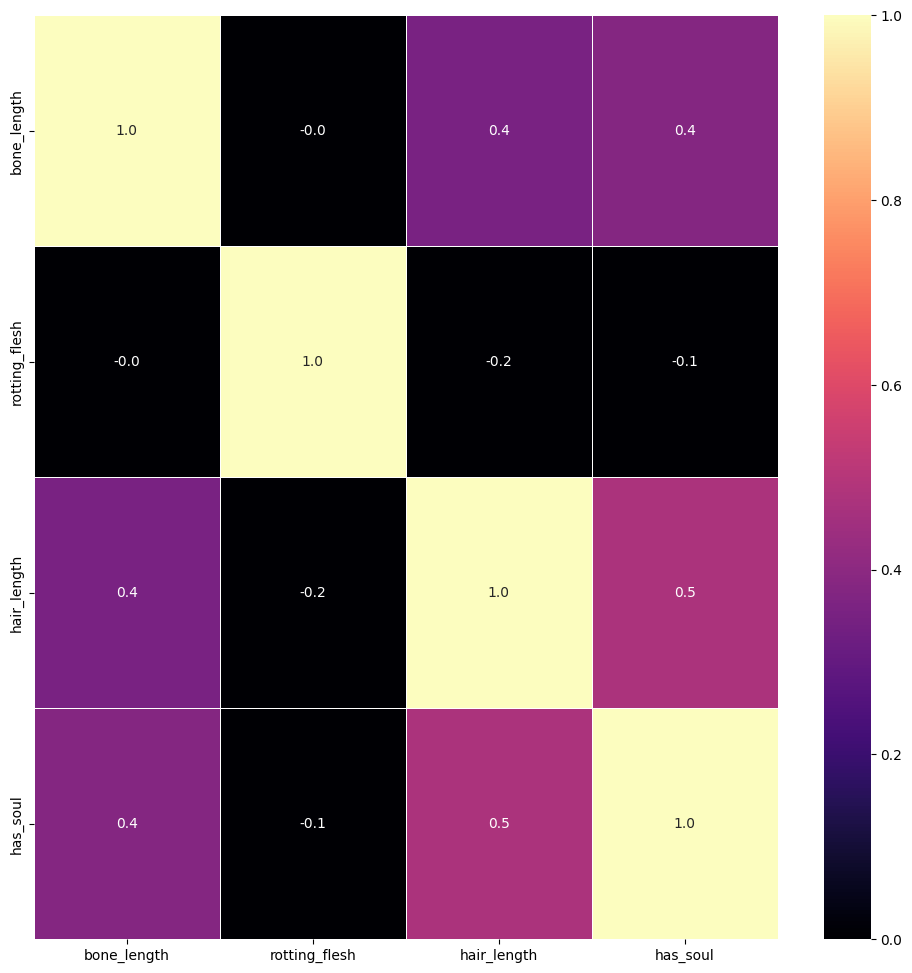

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidth=.5, vmin=0, vmax=1, cmap="magma")

#### Pairplot :

<Figure size 1200x1200 with 0 Axes>

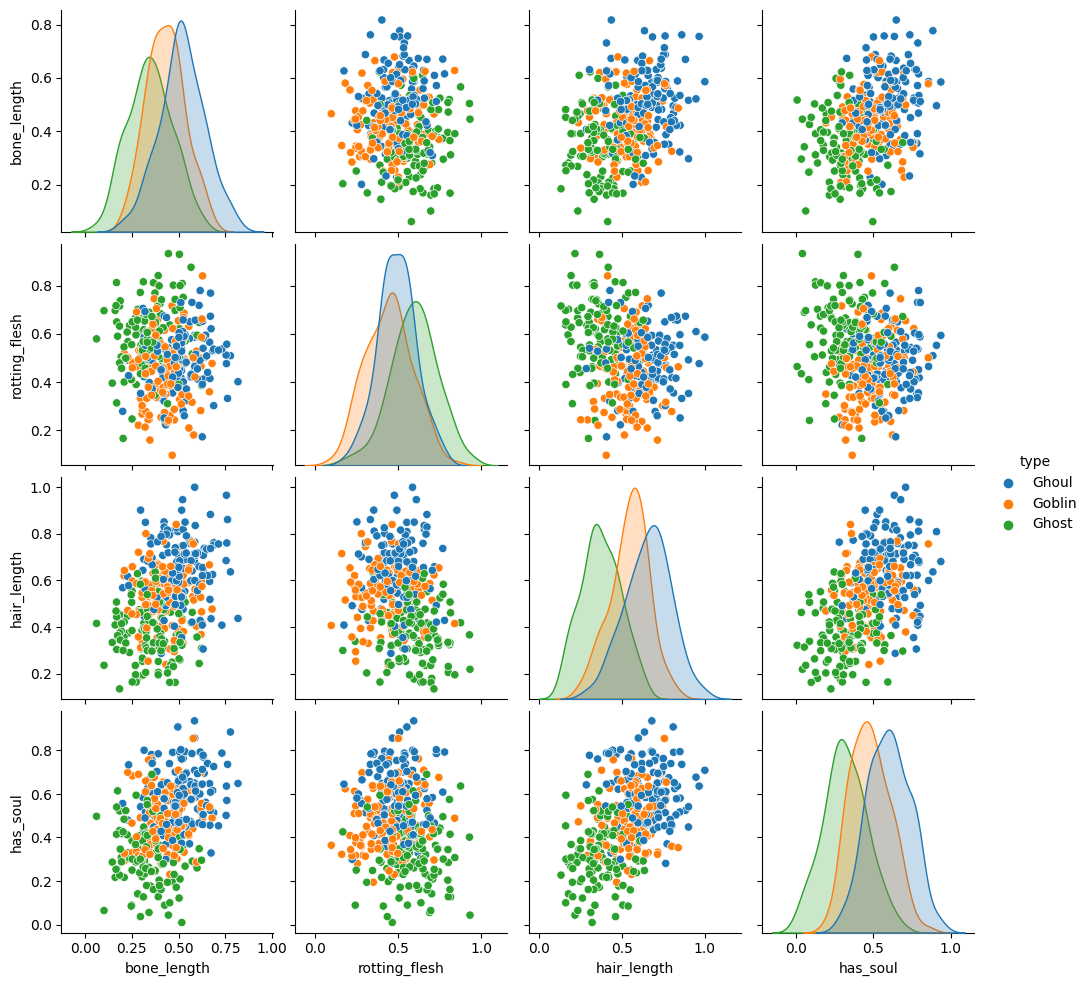

In [14]:
plt.figure(figsize=(12,12))
sns.pairplot(df, hue = 'type')

## let's one hot encoder :

In [15]:
from sklearn.preprocessing import OneHotEncoder

# for encoding :
encoder = OneHotEncoder()

# choose columns to ohe :
df_ohe = encoder.fit_transform(df[['color']])

# create a dataframe :
data_encoded = pd.DataFrame(df_ohe.toarray(), columns=encoder.get_feature_names_out())

display(data_encoded)

,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
366,0.0,0.0,1.0,0.0,0.0,0.0
367,0.0,0.0,0.0,0.0,1.0,0.0
368,0.0,0.0,0.0,1.0,0.0,0.0
369,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
from sklearn.preprocessing import LabelEncoder

lo=LabelEncoder() # to put numbers for type
df["type"]=  lo.fit_transform(df["type"])

In [17]:
data = pd.concat([data_encoded, df],axis = 1)
data = data.drop(columns=['color'])

In [18]:
data

,color_black,color_blood,color_blue,color_clear,color_green,color_white,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.0,0.0,0.0,1.0,0.0,0.0,0.354512,0.350839,0.465761,0.781142,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.575560,0.425868,0.531401,0.439899,2
2,1.0,0.0,0.0,0.0,0.0,0.0,0.467875,0.354330,0.811616,0.791225,1
3,1.0,0.0,0.0,0.0,0.0,0.0,0.776652,0.508723,0.636766,0.884464,1
4,0.0,0.0,0.0,0.0,1.0,0.0,0.566117,0.875862,0.418594,0.636438,0
...,...,...,...,...,...,...,...,...,...,...,...
366,0.0,0.0,1.0,0.0,0.0,0.0,0.458132,0.391760,0.660590,0.635689,2
367,0.0,0.0,0.0,0.0,1.0,0.0,0.331936,0.564836,0.539216,0.551471,0
368,0.0,0.0,0.0,1.0,0.0,0.0,0.481640,0.501147,0.496446,0.544003,1
369,0.0,0.0,0.0,1.0,0.0,0.0,0.294943,0.771286,0.583503,0.300618,0


let's check now the correlation.

<Axes: >

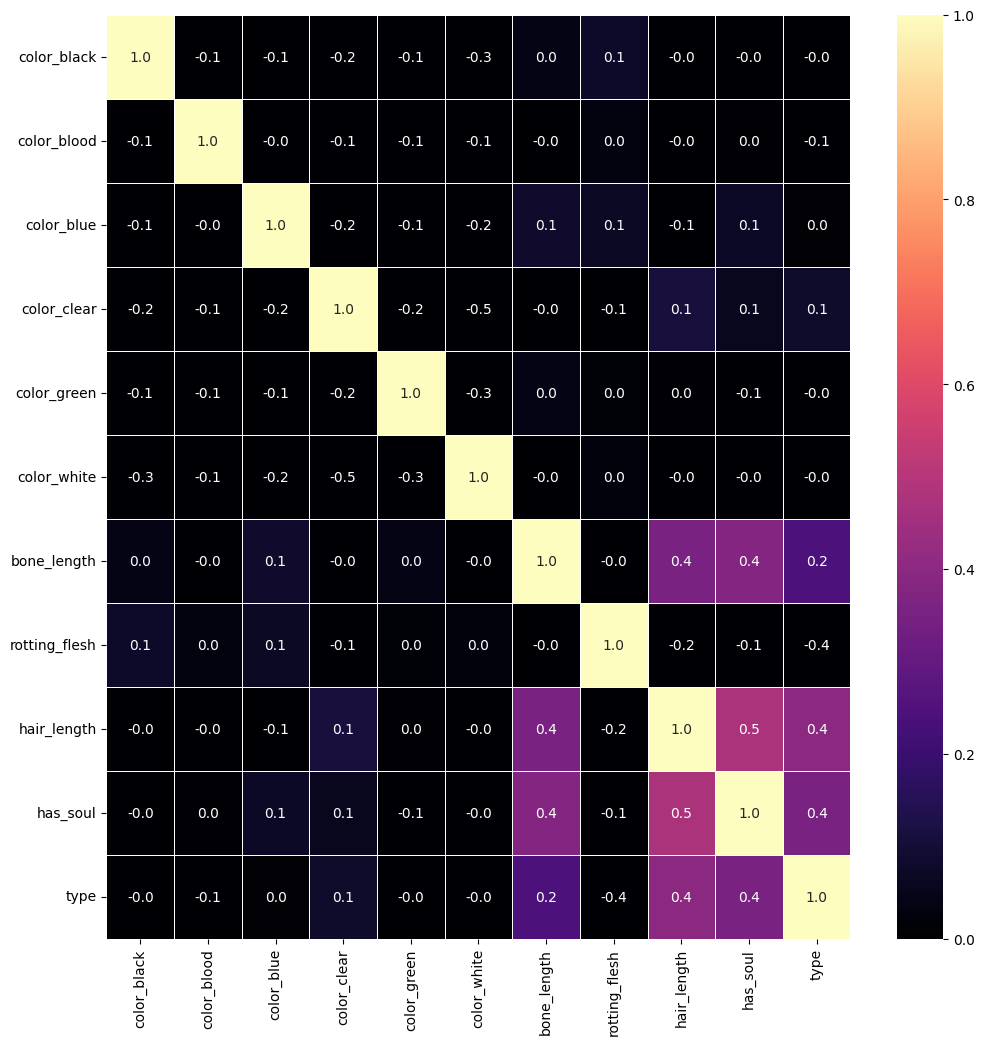

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5, vmin=0, vmax=1, cmap="magma")

# let's try to predict :

In [20]:
X = data.drop(["type"],axis=1)
y = pd.get_dummies(data['type'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [22]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(296, 10) (296, 3)
(75, 10) (75, 3)


# C.N.N from scratch :

In [23]:
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [24]:
model=Sequential()
model.add(Dense(64,input_shape=(X.shape[1],)))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 141,123
Trainable params: 141,123
Non-trai

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

if not os.path.isdir("/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model"):

  epochs= 100 # 20 Epochs

  checkpointer = ModelCheckpoint(filepath='/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model', 
                                verbose=2, save_best_only=True)

  early_stopping = EarlyStopping(
        monitor='val_loss', # looking about this score
        patience = 5, # Equivalent epochs didnt move
        verbose=2,
        mode='auto',
        baseline=None,
        restore_best_weights=False,
        )
  
  csvlogger = CSVLogger(
    filename= "/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model.log",
    separator = ",",
    append = False
    )


  history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    epochs=epochs,
    callbacks=[checkpointer, early_stopping, csvlogger]
    )

else :
  model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model')
  print('The Model has already been saved')

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 1.0662 - accuracy: 0.3851
Epoch 1: val_loss improved from inf to 1.00635, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 6s 325ms/step - loss: 1.0662 - accuracy: 0.3851 - val_loss: 1.0064 - val_accuracy: 0.4533
Epoch 2/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.9532 - accuracy: 0.5938
Epoch 2: val_loss improved from 1.00635 to 0.79514, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 2s 239ms/step - loss: 0.9310 - accuracy: 0.5743 - val_loss: 0.7951 - val_accuracy: 0.6000
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.8326 - accuracy: 0.5312
Epoch 3: val_loss improved from 0.79514 to 0.62707, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 1s 161ms/step - loss: 0.7701 - accuracy: 0.5946 - val_loss: 0.6271 - val_accuracy: 0.7333
Epoch 4/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.6493 - accuracy: 0.6701
Epoch 4: val_loss improved from 0.62707 to 0.59270, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 2s 166ms/step - loss: 0.6480 - accuracy: 0.6689 - val_loss: 0.5927 - val_accuracy: 0.6933
Epoch 5/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4943 - accuracy: 0.7500
Epoch 5: val_loss did not improve from 0.59270
10/10 [==============================] - 0s 9ms/step - loss: 0.6605 - accuracy: 0.6689 - val_loss: 0.6559 - val_accuracy: 0.6267
Epoch 6/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6097 - accuracy: 0.7188
Epoch 6: val_loss improved from 0.59270 to 0.52507, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 2s 184ms/step - loss: 0.6045 - accuracy: 0.6757 - val_loss: 0.5251 - val_accuracy: 0.7467
Epoch 7/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.5539 - accuracy: 0.6875
Epoch 7: val_loss did not improve from 0.52507
10/10 [==============================] - 0s 10ms/step - loss: 0.5844 - accuracy: 0.7027 - val_loss: 0.6053 - val_accuracy: 0.6667
Epoch 8/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.6387 - accuracy: 0.7070
Epoch 8: val_loss did not improve from 0.52507
10/10 [==============================] - 0s 18ms/step - loss: 0.6374 - accuracy: 0.7027 - val_loss: 0.5614 - val_accuracy: 0.7067
Epoch 9/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6035 - accuracy: 0.7500
Epoch 9: val_loss improved from 0.52507 to 0.51429, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 3s 283ms/step - loss: 0.5693 - accuracy: 0.7061 - val_loss: 0.5143 - val_accuracy: 0.7600
Epoch 10/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4881 - accuracy: 0.7500
Epoch 10: val_loss improved from 0.51429 to 0.49615, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 1s 115ms/step - loss: 0.5510 - accuracy: 0.7432 - val_loss: 0.4962 - val_accuracy: 0.7333
Epoch 11/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6562
Epoch 11: val_loss did not improve from 0.49615
10/10 [==============================] - 0s 5ms/step - loss: 0.5450 - accuracy: 0.7264 - val_loss: 0.5010 - val_accuracy: 0.7733
Epoch 12/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.8438
Epoch 12: val_loss improved from 0.49615 to 0.46858, saving model to /content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model


10/10 [==============================] - 1s 95ms/step - loss: 0.5512 - accuracy: 0.7365 - val_loss: 0.4686 - val_accuracy: 0.7600
Epoch 13/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.5418 - accuracy: 0.7500
Epoch 13: val_loss did not improve from 0.46858
10/10 [==============================] - 0s 6ms/step - loss: 0.5463 - accuracy: 0.7297 - val_loss: 0.5815 - val_accuracy: 0.7067
Epoch 14/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.4295 - accuracy: 0.8750
Epoch 14: val_loss did not improve from 0.46858
10/10 [==============================] - 0s 6ms/step - loss: 0.5777 - accuracy: 0.7230 - val_loss: 0.5058 - val_accuracy: 0.7333
Epoch 15/100
 1/10 [==>...........................] - ETA: 0s - loss: 0.5594 - accuracy: 0.6562
Epoch 15: val_loss did not improve from 0.46858
10/10 [==============================] - 0s 6ms/step - loss: 0.5847 - accuracy: 0.7027 - val_loss: 0.6212 - val_accuracy: 0.7600
Epoch 16/100
 1/10 [==>...........................]

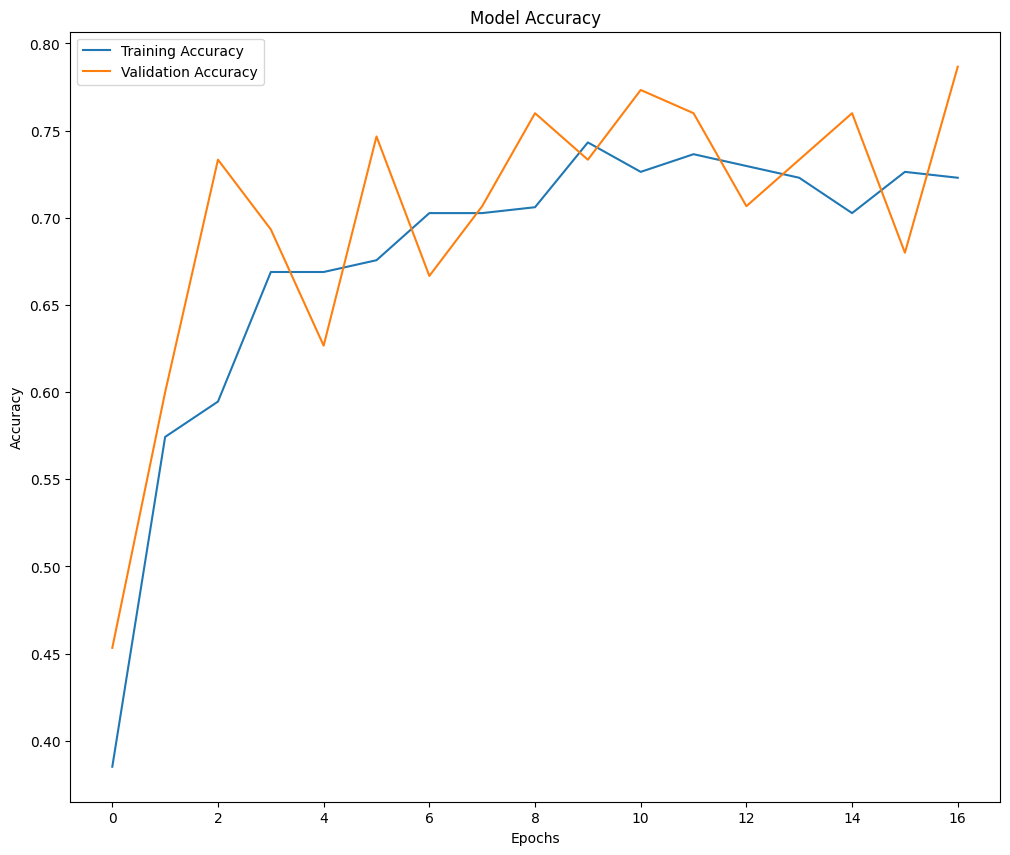

CPU times: user 1.86 s, sys: 414 ms, total: 2.27 s
Wall time: 2.08 s


In [27]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_1.jpg'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Accuracy')
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('Epochs')
  plt.legend(['Training Accuracy','Validation Accuracy'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_1.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_1.jpg'))

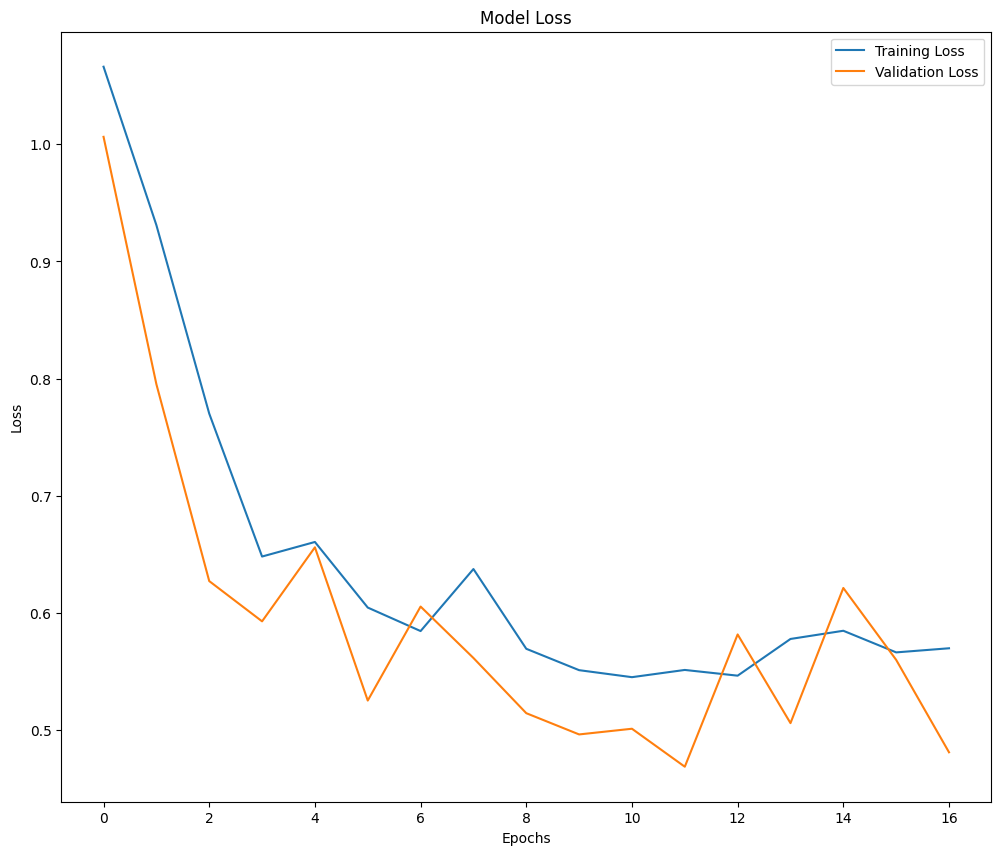

CPU times: user 1.83 s, sys: 397 ms, total: 2.23 s
Wall time: 2.03 s


In [28]:
%%time

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_2.jpg'):

  plt.figure(figsize=(12,10))
  plt.subplot()
  plt.title('Model Loss')
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.legend(['Training Loss','Validation Loss'])
  plt.savefig('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model_2.jpg', transparent= False, bbox_inches= 'tight', dpi= 900)
  plt.show()

else :

  plt.imshow(plt.imread('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/model.jpg'))

As we can see our prediction are " OK ", but i think we can have better score with regression algorithm.

## Regression :

## Pipeline :

### Standard Scaler :

In [29]:
X = data.drop(["type"],axis=1)
y = data['type']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [31]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Instancier les algorithmes de classification
log_reg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Définir les étapes de la pipeline
steps = [('scaler', StandardScaler()),
         ('classifiers', VotingClassifier(estimators=[('lr', log_reg), ('rf', rf), ('knn', knn), ('dt', dt)], voting='hard'))]

# Créer la pipeline
pipeline = Pipeline(steps)

# Définir les paramètres à tester pour la recherche de grille
param_grid = {'classifiers__weights': [None, [1,1,1,1]],
              'classifiers__lr__C': [0.1, 1, 10],
              'classifiers__rf__n_estimators': [10, 50, 100],
              'classifiers__knn__n_neighbors': [3, 5, 7],
              'classifiers__dt__max_depth': [3, 5, 7]}

# Créer la recherche de grille
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Appliquer la recherche de grille aux données
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifiers',
                                        VotingClassifier(estimators=[('lr',
                                                                      LogisticRegression()),
                                                                     ('rf',
                                                                      RandomForestClassifier()),
                                                                     ('knn',
                                                                      KNeighborsClassifier()),
                                                                     ('dt',
                                                                      DecisionTreeClassifier())]))]),
             param_grid={'classifiers__dt__max_depth': [3, 5, 7],
                         'classifiers__knn__n_neighbors': [3, 5, 7],
                         'classifiers__lr__C': [0.1, 1, 10],
                         'classifiers__rf__n_estimators': [10, 50, 100],
                         'classifiers__weights': [None, [1, 1, 1, 1]]})

#### Save the model with pickle :

In [32]:
import pickle

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/best_model_std.pkl'):

  # Train the model :
  best_model = grid_search.best_estimator_

  # Save the model :
  with open('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/best_model_std.pkl', 'wb') as handle:
      pickle.dump(best_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

else :
  
  # load the model :
  with open('/content/drive/My Drive/Colab Notebooks/ghouls-goblins-and-ghosts-boo/best_model_std.pkl', 'rb') as handle:
      best_model = pickle.load(handle)

#### Modification with best params

In [33]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifiers',
                 VotingClassifier(estimators=[('lr', LogisticRegression(C=10)),
                                              ('rf',
                                               RandomForestClassifier(n_estimators=50)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=7)),
                                              ('dt',
                                               DecisionTreeClassifier(max_depth=5))]))])

In [34]:
# Récupérer les résultats de la recherche de grille
results = pd.DataFrame(grid_search.cv_results_)

In [35]:
print(results[['params', 'mean_test_score']])

                                                params  mean_test_score
0    {'classifiers__dt__max_depth': 3, 'classifiers...         0.702486
1    {'classifiers__dt__max_depth': 3, 'classifiers...         0.682373
2    {'classifiers__dt__max_depth': 3, 'classifiers...         0.692486
3    {'classifiers__dt__max_depth': 3, 'classifiers...         0.702542
4    {'classifiers__dt__max_depth': 3, 'classifiers...         0.699153
..                                                 ...              ...
157  {'classifiers__dt__max_depth': 7, 'classifiers...         0.709322
158  {'classifiers__dt__max_depth': 7, 'classifiers...         0.712655
159  {'classifiers__dt__max_depth': 7, 'classifiers...         0.705989
160  {'classifiers__dt__max_depth': 7, 'classifiers...         0.699153
161  {'classifiers__dt__max_depth': 7, 'classifiers...         0.699209

[162 rows x 2 columns]


#### Vizualisation : 

source : https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/

In [36]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Faire des prédictions avec le modèle sur les données de test
y_pred = best_model.predict(X_test)

# Calculer la matrice de confusion
confusion_matrix = confusion_matrix(y_test, y_pred)

# Récupérer les vrais positifs, faux positifs, faux négatifs et vrais négatifs pour chaque classe
true_positives = np.diag(confusion_matrix)
false_positives = np.sum(confusion_matrix, axis=0) - true_positives
false_negatives = np.sum(confusion_matrix, axis=1) - true_positives
true_negatives = np.sum(confusion_matrix) - (true_positives + false_positives + false_negatives)

# Afficher les résultats pour chaque classe
for i in range(len(true_positives)):
    print(f"Classe {i+1}:")
    print("")
    print(f"Vrais positifs : {true_positives[i]}")
    print(f"Faux positifs : {false_positives[i]}")
    print(f"Faux négatifs : {false_negatives[i]}")
    print(f"Vrais négatifs : {true_negatives[i]}\n")
    print(f"Le pourcentage de réussite à détecter la classe est de : {round((true_positives[i]+true_negatives[i]) / (true_positives[i]+true_negatives[i]+false_positives[i]+false_negatives[i]) * 100, 2)}%")
    print("")

Classe 1:

Vrais positifs : 26
Faux positifs : 2
Faux négatifs : 3
Vrais négatifs : 44

Le pourcentage de réussite à détecter la classe est de : 93.33%

Classe 2:

Vrais positifs : 21
Faux positifs : 5
Faux négatifs : 1
Vrais négatifs : 48

Le pourcentage de réussite à détecter la classe est de : 92.0%

Classe 3:

Vrais positifs : 17
Faux positifs : 4
Faux négatifs : 7
Vrais négatifs : 47

Le pourcentage de réussite à détecter la classe est de : 85.33%



as we can see our prediction is way better with the regression algorithm.

ADD CONFUSION MATRIX FOR ALL CLASS